In [1]:
import numpy as np
import scipy as sp
from scipy.special import expit
from scipy.integrate import quad
from scipy.constants import *

from IDRIM.constants import *
from IDRIM.relations import *

import matplotlib.pyplot as plt

In [2]:
textsize = 18
font = {'family': 'DejaVu Sans', 'weight': 'normal','size': textsize,}
plt.rc('font', family='DejaVu Sans', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=textsize)
plt.rc('ytick', labelsize=textsize)
plt.rc('axes', labelsize=textsize)
plt.rc('lines', linewidth=2)
width = 10
height = width / 1.618
plt.rcParams["figure.figsize"] = (width, height)

In [3]:
import IDRIM.sample as sam

In [4]:
print("ENZ Frequency:", sam.ENZFreqSolver(wp0, eps_inf, gamma0)/(1e12), "THz")

ENZ Frequency: 246.29686337943141 THz


In [5]:
from IDRIM.commons import *

In [6]:
c/(1240*nm)/1e12

241.7681112903226

Minimum Effective Mass: 0.2630056343633858 m_e
Number Density at 0 Kelvin: 1.5335883634146102e+27
Chemical Potential at 300K: [1.22140624] eV


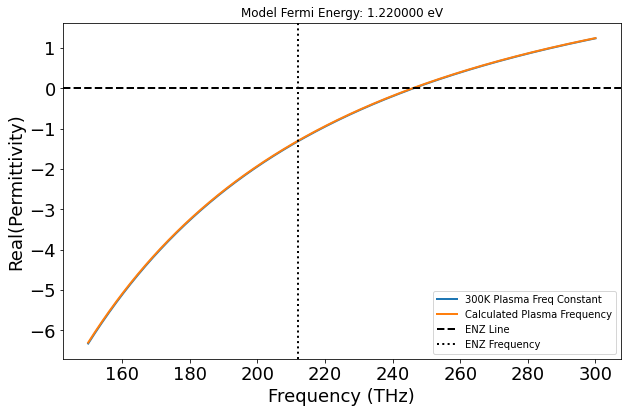

In [14]:
Exp, Mod = sam.Solver(wp0, Ef=1.22*e)

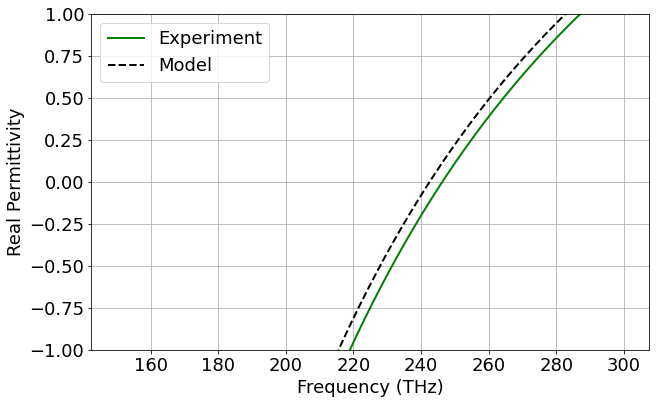

In [8]:
Frequency_array = np.linspace(150, 300, 1000)*1e12*2*pi
plt.plot(Frequency_array/(1e12*2*pi), Exp.real, label="Experiment", color="green")
plt.plot(Frequency_array/(1e12*2*pi), Mod.real, label="Model", color="black", linestyle="dashed")
plt.xlabel("Frequency (THz)", fontsize=18)
plt.ylabel("Real Permittivity", fontsize=18)
plt.grid()
plt.ylim(-1, 1)
#plt.xlim(210, 220)
plt.legend(loc=2, prop={'size':18})
plt.savefig('perm_compare.png', dpi=200)

Minimum Effective Mass: 0.21990330377269957 m_e
Number Density at 0 Kelvin: 7.917019698036565e+26
Chemical Potential at 300K: [0.87012666] eV


(array([-3.08087668e+00+0.97178745j, -3.06737907e+00+0.96891282j,
        -3.05392084e+00+0.96604948j, -3.04050184e+00+0.96319738j,
        -3.02712193e+00+0.96035645j, -3.01378094e+00+0.95752665j,
        -3.00047873e+00+0.95470792j, -2.98721515e+00+0.95190021j,
        -2.97399006e+00+0.94910347j, -2.96080329e+00+0.94631763j,
        -2.94765472e+00+0.94354265j, -2.93454418e+00+0.94077847j,
        -2.92147154e+00+0.93802505j, -2.90843665e+00+0.93528233j,
        -2.89543937e+00+0.93255025j, -2.88247955e+00+0.92982878j,
        -2.86955705e+00+0.92711785j, -2.85667172e+00+0.92441741j,
        -2.84382343e+00+0.92172742j, -2.83101204e+00+0.91904782j,
        -2.81823740e+00+0.91637857j, -2.80549937e+00+0.91371961j,
        -2.79279782e+00+0.9110709j , -2.78013261e+00+0.90843238j,
        -2.76750360e+00+0.90580401j, -2.75491066e+00+0.90318574j,
        -2.74235364e+00+0.90057751j, -2.72983241e+00+0.89797929j,
        -2.71734683e+00+0.89539103j, -2.70489678e+00+0.89281267j,
        -2

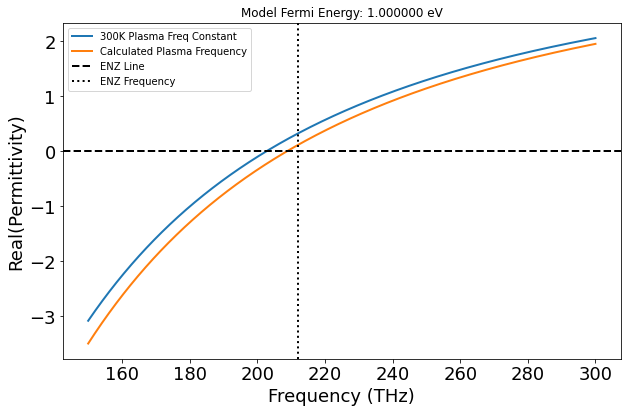

In [9]:
sam.Solver(2497746252385499.5)

In [10]:
s

NameError: name 's' is not defined